
# Exploratory Data Analysis (EDA) on sn_clean Dataset

This notebook documents the process of EDA on the `sn_clean` dataset. We start by loading the data, identifying potential data quality issues, and then addressing them. The subsequent sections will delve into a deeper exploration and visualization of the dataset.


## Data Loading



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys

sn_clean = pd.read_csv("../data/processed/sn_clean.csv")
sn_clean.head()



,BilID,PersonID,LatitudeStart,LongitudeStart,LatitudeEnd,LongitudeEnd,ReservationTime,StartTime,EndTime,Age,Gender,BatteryStart,BatteryEnd,KmDriven,FromZoneID,ToZoneID,TripDuration,Month,Weekday,StartHour
0,WBY1Z21040V307905,32614,55.670268,12.586064,55.652954,12.544699,2017-08-16 14:40:29,2017-08-16 14:34:29,2017-08-16 14:52:55,32,M,94,91,5,103142,102851,0 days 00:18:26,8,Wednesday,14
1,WBY1Z21040V308214,44363,55.687024,12.585952,55.726655,12.553914,2017-08-16 14:42:00,2017-08-16 14:38:00,2017-08-16 15:05:22,25,M,48,42,7,102212,157231,0 days 00:27:22,8,Wednesday,14
2,WBY1Z210X0V308265,39704,55.672866,12.597133,55.669174,12.540440,2017-08-01 19:21:59,2017-08-01 19:21:59,2017-08-02 11:22:39,23,M,41,9,28,103142,102821,0 days 16:00:40,8,Tuesday,19
3,WBY1Z21010V308302,43260,55.691921,12.563013,55.681266,12.518947,2017-08-02 00:53:49,2017-08-02 00:53:49,2017-08-02 15:02:31,23,M,59,53,5,102441,147233,0 days 14:08:42,8,Wednesday,0
4,WBY1Z210X0V308041,40964,55.683683,12.581574,55.695163,12.460236,2017-08-02 09:36:51,2017-08-02 09:31:51,2017-08-02 12:37:15,45,M,73,46,29,102231,175041,0 days 03:05:24,8,Wednesday,9


## Addressing Data Quality Issues

### Erroneous End Coordinates



In [15]:
sn_clean = sn_clean[sn_clean["LatitudeEnd"] != 0]



### Negative Values in KmDriven



In [16]:
sn_clean = sn_clean[sn_clean["KmDriven"] >= 0]



### BatteryEnd Value of -1%



In [17]:
sn_clean.loc[sn_clean["BatteryEnd"] == -1, "BatteryEnd"] = 0



### Zone IDs Set to 0



In [18]:
sn_clean = sn_clean[(sn_clean["FromZoneID"] != 0) & (sn_clean["ToZoneID"] != 0)]




## Distribution of Categorical Variables

### Gender Distribution

The dataset contains information on the gender of users. Here's a visualization of the distribution of the `Gender` variable.

```python
plt.figure(figsize=(8, 6))
sns.countplot(data=sn_clean, x='Gender')
plt.title('Distribution of Gender')
plt.ylabel('Number of Trips')
plt.show()
```




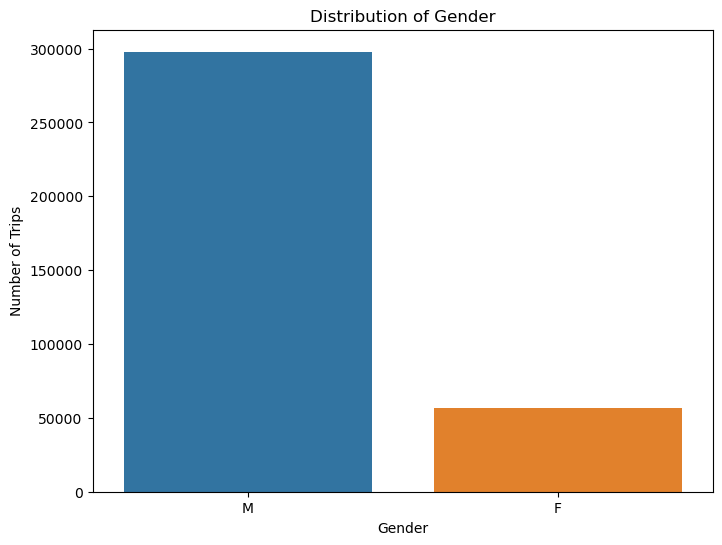

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=sn_clean, x='Gender')
plt.title('Distribution of Gender')
plt.ylabel('Number of Trips')
plt.show()




## Univariate Analysis

### BatteryEnd Distribution

The `BatteryEnd` column represents the battery level at the end of trips. Here's a summary of its distribution:

```python
battery_end_description = sn_clean['BatteryEnd'].describe()
battery_end_description
```

- The average battery level at the end of trips is approximately 50.73%.
- The minimum battery level observed at the end of trips is 0%, indicating some trips depleted the entire battery.
- The maximum battery level at the end of trips is 100%.
- 25% of the trips end with a battery level of 32% or below.
- 50% (or the median) of the trips end with a battery level of 50%.
- 75% of the trips end with a battery level of 69% or below.



## Bivariate Analysis

### Relationship between KmDriven and BatteryConsumed

We computed the battery consumed during each trip (`BatteryStart - BatteryEnd`) and explored its relationship with the distance driven (`KmDriven`).

```python
sn_clean['BatteryConsumed'] = sn_clean['BatteryStart'] - sn_clean['BatteryEnd']
correlation_km_driven_battery = sn_clean[['KmDriven', 'BatteryConsumed']].corr()
correlation_km_driven_battery
```

There's a positive correlation of approximately 0.204 between kilometers driven and battery consumed. The scatter plot below visualizes this relationship:

```python
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sn_clean, x='KmDriven', y='BatteryConsumed', alpha=0.5)
plt.title('Relationship between KmDriven and BatteryConsumed')
plt.xlabel('Kilometers Driven')
plt.ylabel('Battery Consumed (%)')
plt.show()
```




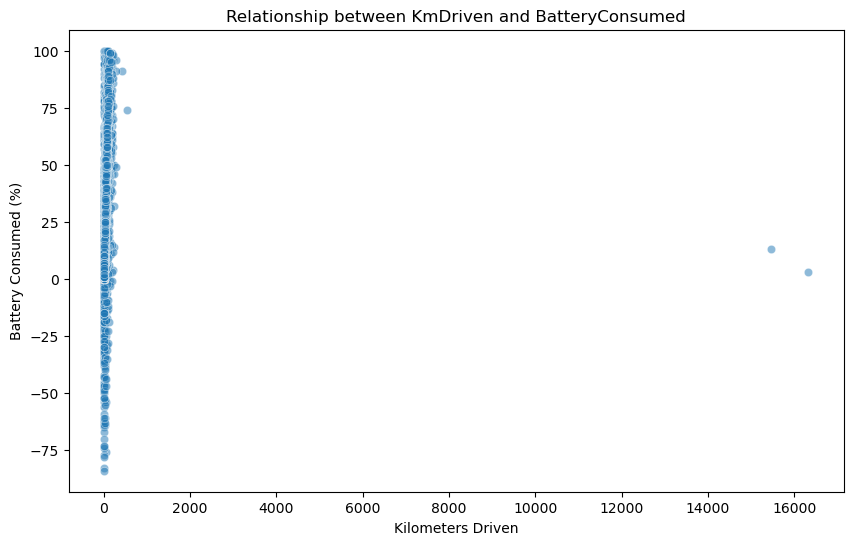

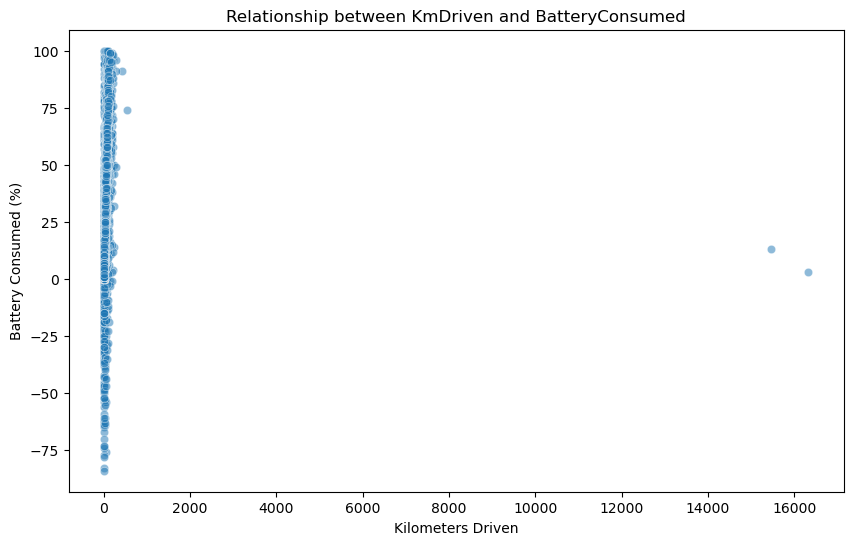

In [20]:
sn_clean['BatteryConsumed'] = sn_clean['BatteryStart'] - sn_clean['BatteryEnd']
correlation_km_driven_battery = sn_clean[['KmDriven', 'BatteryConsumed']].corr()
correlation_km_driven_battery

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sn_clean, x='KmDriven', y='BatteryConsumed', alpha=0.5)
plt.title('Relationship between KmDriven and BatteryConsumed')
plt.xlabel('Kilometers Driven')
plt.ylabel('Battery Consumed (%)')
plt.show()


correlation_km_driven_battery

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sn_clean, x='KmDriven', y='BatteryConsumed', alpha=0.5)
plt.title('Relationship between KmDriven and BatteryConsumed')
plt.xlabel('Kilometers Driven')
plt.ylabel('Battery Consumed (%)')
plt.show()




## Univariate Analysis

We explored the distributions of various columns in the dataset using histograms, boxplots, and count plots. This section provides a summary of the observed distributions and insights drawn from them.

### Battery Consumed per Trip

The dataset contains information on the battery consumed during each trip. Here's a visualization of its distribution.

```python
sns.histplot(data=sn_clean, x='BatteryConsumed', bins=30, kde=True)
plt.title('Distribution of Battery Consumed per Trip')
plt.xlabel('Battery Consumed (%)')
plt.ylabel('Number of Trips')
plt.show()
```

### Km Driven per Trip

We visualized the distribution of kilometers driven per trip using a boxplot to identify potential outliers and understand the general spread of the data.

```python
sns.boxplot(data=sn_clean, x='KmDriven')
plt.title('Boxplot of Km Driven per Trip')
plt.xlabel('Km Driven')
plt.show()
```




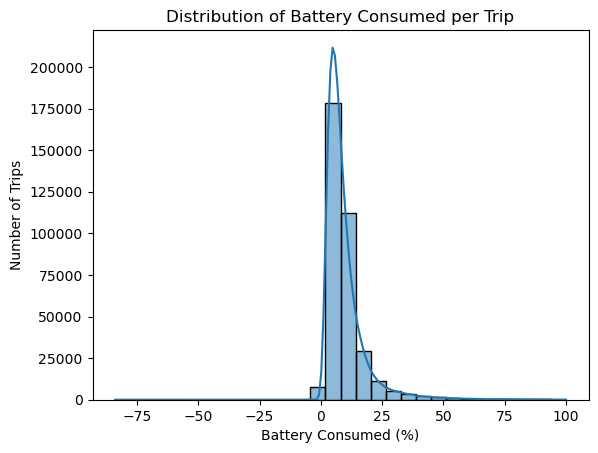

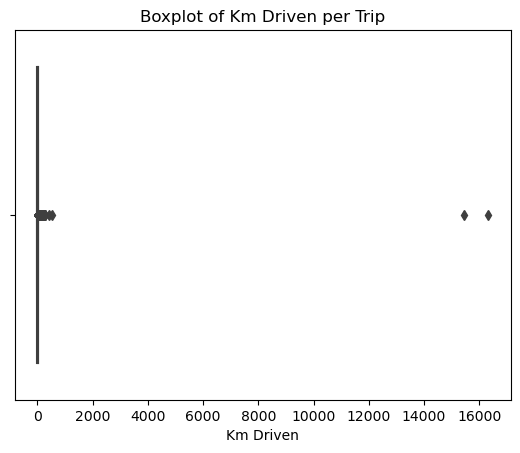

In [21]:
sns.histplot(data=sn_clean, x='BatteryConsumed', bins=30, kde=True)
plt.title('Distribution of Battery Consumed per Trip')
plt.xlabel('Battery Consumed (%)')
plt.ylabel('Number of Trips')
plt.show()

sns.boxplot(data=sn_clean, x='KmDriven')
plt.title('Boxplot of Km Driven per Trip')
plt.xlabel('Km Driven')
plt.show()




## Bivariate and Multivariate Analysis

### KmDriven vs. TripDuration

To understand the relationship between the distance driven (`KmDriven`) and the duration of the trip (`TripDuration`), we used a hexbin plot. This type of plot visualizes the density of points, making it efficient for large datasets.

```python
plt.figure(figsize=(10, 6))
sns.jointplot(data=sn_clean, x='KmDriven', y='TripDuration', kind='hex', cmap='Blues', gridsize=20)
plt.suptitle('Hexbin Plot of KmDriven vs. TripDuration', y=1.02)
plt.show()
```

The darker hexagons in the plot represent areas with a higher concentration of trips. From the plot, it's evident that most trips are short in duration and cover small distances.

### Correlation Matrix for Numerical Variables

A heatmap of the correlation matrix provides insights into the relationships between numerical variables.

```python
correlation_matrix = sn_clean[['KmDriven', 'TripDuration', 'BatteryStart', 'BatteryEnd', 'Age']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()
```

There's a noticeable positive correlation between `KmDriven` and `TripDuration`, as expected. Other variables like `BatteryStart` and `BatteryEnd` also show some degree of correlation.




ValueError: could not convert string to float: '0 days 00:18:26'

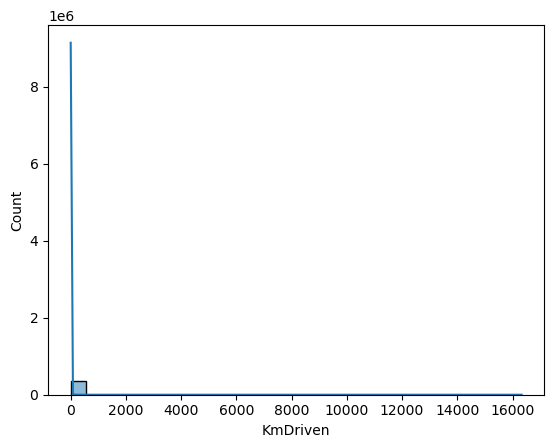

In [23]:
sns.histplot(data=sn_clean, x='KmDriven', bins=30, kde=True)
correlation_matrix = sn_clean[['KmDriven', 'TripDuration', 'BatteryStart', 'BatteryEnd', 'Age']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()




## Handling Outliers

### Outliers in KmDriven

Using a boxplot, we identified potential outliers in the `KmDriven` column. To quantify these outliers, the Interquartile Range (IQR) method was employed.

```python
# Calculate Q1, Q3 and IQR for KmDriven
Q1 = sn_clean['KmDriven'].quantile(0.25)
Q3 = sn_clean['KmDriven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outlier rows
outliers = sn_clean[(sn_clean['KmDriven'] < lower_bound) | (sn_clean['KmDriven'] > upper_bound)]
```

From this analysis, 21,789 trips were identified as outliers. The distribution of these outliers ranged from 20 kilometers to a maximum of 16,328 kilometers, with a median of 28 kilometers.




In [ ]:
outliers['KmDriven'].describe()




## Analysis of Trips Between 100km and 250km

### 1. Spatial Analysis

A spatial visualization of the start and end points of these trips was conducted. Both start and end points were scattered throughout Copenhagen with a few trips originating or concluding outside the city boundaries.

### 2. Time Analysis

The distribution of these trips was analyzed across different hours of the day and days of the week:
- A noticeable peak was observed during the early hours (1-3 AM).
- The number of such trips was relatively consistent across weekdays with a slight increase on weekends.

### 3. Battery Usage Analysis

The battery levels at the start and end of these trips were explored:
- The majority of trips started with the battery level between 40% and 80%.
- Many trips consumed most of the battery's charge, ending with levels close to 0%.



## Analysis of Trips Between 50km and 100km

### 1. Spatial Analysis

A spatial visualization was conducted for the start and end points of these trips. Points were spread throughout Copenhagen, with some trips originating or concluding outside the city boundaries.

### 2. Time Analysis

The distribution of these trips was analyzed across different hours of the day and days of the week:
- A noticeable peak was observed during the early hours (1-3 AM).
- The number of such trips was slightly higher on Fridays and Saturdays.

### 3. Battery Usage Analysis

The battery levels at the start and end of these trips were explored:
- Most trips started with the battery level around 40-50%.
- A significant portion of these trips consumed most of the battery, ending with levels close to 0%.



## Analysis of Trips Between 50km and 100km

### 1. Spatial Analysis

A spatial visualization of the start and end points of these trips was conducted. Both start and end points were distributed throughout Copenhagen with some trips originating or concluding outside the city boundaries.

### 2. Time Analysis

The distribution of these trips was analyzed across different hours of the day and days of the week:
- A noticeable peak was observed during the daytime hours, particularly around midday and early evening.
- The number of such trips was slightly higher on Fridays and Saturdays.

### 3. Battery Usage Analysis

The battery levels at the start and end of these trips were explored:
- The majority of trips started with the battery level between 40% and 80%, with a clear peak around 70%.
- Many trips consumed most of the battery's charge, ending with levels close to 0%.





## Categorical vs. Numerical Analysis

### Distribution of KmDriven Across Days of the Week

- The median distance driven appears fairly consistent across all days.
- There's a wider range of trip distances on weekends, especially on Saturdays, suggesting more variability or outliers on weekends.
- The whiskers of the box plot (representing the range within which most data falls) are extended on Saturdays, indicating longer trips on that day.

### Distribution of KmDriven Across Hours of the Day

- The median distance driven is fairly consistent throughout the day.
- The early morning hours (from around midnight to 3 AM) have a wider interquartile range, suggesting more variability in the distances of trips during this period.
- The boxplot whiskers for early morning hours extend further, indicating longer trips during these hours.
- From 4 AM to 6 AM, there's a reduction in the distance driven, and then it stays relatively consistent throughout the day.



## Categorical vs. Categorical Analysis

A cross-tabulation between `Weekday` and `StartHour` was conducted to understand car usage patterns:

1. **Weekdays**: Clear peaks are observed around commuting hours (e.g., 8 AM and 5 PM), especially from Monday to Friday.
2. **Weekends**: There's a higher frequency of car usage during the late night to early morning hours, especially on Saturdays, suggesting weekend outings or longer trips that start late at night.
3. **Sunday Evenings**: A decline in car usage on Sunday evenings was observed.

The heatmap visualization provides a clear view of the patterns of car usage throughout the week, aiding in understanding car availability and demand patterns.



## Categorical vs. Categorical Analysis

### Car Usage Frequency by Day and Hour (Heatmap)

The heatmap visualizes car usage frequency by day and hour:
- Darker shades represent higher frequencies, indicating peak car usage times.
- Lighter shades represent lower frequencies.

Observations:
1. **Weekdays**: Clear peaks around commuting hours (e.g., 8 AM and 5 PM) from Monday to Friday.
2. **Weekends**: Higher frequency of car usage during the late night to early morning hours, especially on Saturdays.
3. **Sunday Evenings**: A decline in car usage.

### Bar Plots for Weekday vs. StartHour and Monthly Usage

The bar plots provide a detailed view of the car usage distribution by hour for each day and by month.


In [ ]:
sns.countplot(data=sn_clean, x='Month', palette='viridis')

In [ ]:

# Corrected bar plot for Weekday vs. StartHour
sns.countplot(data=sn_clean, x='Weekday', hue='StartHour', order=correct_order, palette='viridis')


In [ ]:

# Histogram for the distribution of KmDriven
sns.histplot(data=sn_clean, x='KmDriven', bins=50, kde=True, color='blue')
plt.title('Distribution of Kilometers Driven per Trip')
plt.xlabel('Km Driven')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


In [ ]:

# Histograms for the distribution of BatteryStart and BatteryEnd
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
sns.histplot(data=sn_clean, x='BatteryStart', bins=50, kde=True, color='green', ax=ax[0])
sns.histplot(data=sn_clean, x='BatteryEnd', bins=50, kde=True, color='red', ax=ax[1])
plt.tight_layout()


In [ ]:

# Bar plot for the frequency of trips across months
sns.countplot(data=sn_clean, x='Month', palette='viridis', order=range(1, 13))
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


In [ ]:

# Removing months with no trips (June and July) from the dataset
sn_clean = sn_clean[sn_clean['Month'].isin([1, 2, 3, 4, 5, 8, 9, 10, 11, 12])]
